In [1]:
!pip install gym-super-mario-bros

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.



  Created wheel for nes-py: filename=nes_py-8.1.8-cp37-cp37m-win_amd64.whl size=46823 sha256=f2eefa7f68bcbfb16c5a162ca917bc02565d75d3921821b334f9a6ff7e230cb7
  Stored in directory: c:\users\ultra\appdata\local\pip\cache\wheels\f2\05\1f\608f15ab43187096eb5f3087506419c2d9772e97000f3ba025
Successfully built nes-py
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.2
    Uninstalling numpy-1.18.2:
      Successfully uninstalled numpy-1.18.2


In [2]:
!pip install nes_py

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [6]:
#Importing packages

import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import sys

SIMPLE_MOVEMENT


[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [7]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #From documentation https://pypi.org/project/gym-super-mario-bros/
env = JoypadSpace(env, SIMPLE_MOVEMENT) #Wrapping to simplify for the AI to learn to play


In [4]:
done = True #Flag to restart game or not

for step in range(5000): #Looping through frames of the games
    if done:
        #Start the game
        env.reset()
        #Passing random action to the game
    state, rewward, done, info = env.step(env.action_space.sample()) 
    env.render()
env.close()

KeyboardInterrupt: 

![SuperMario](img/RandomAction.PNG)

In [1]:
!pip install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.



  Attempting uninstall: torch
    Found existing installation: torch 1.7.1+cpu
    Uninstalling torch-1.7.1+cpu:
      Successfully uninstalled torch-1.7.1+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.2+cpu
    Uninstalling torchvision-0.8.2+cpu:
      Successfully uninstalled torchvision-0.8.2+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.7.2
    Uninstalling torchaudio-0.7.2:
      Successfully uninstalled torchaudio-0.7.2


In [2]:
!pip install stable-baselines3[extra]

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Reason for being yanked: re-release with new wheels


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.4.0
    Uninstalling importlib-metadata-3.4.0:
      Successfully uninstalled importlib-metadata-3.4.0


In [15]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [16]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #From documentation https://pypi.org/project/gym-super-mario-bros/
env = JoypadSpace(env, SIMPLE_MOVEMENT)

#Grayscale environment
env = GrayScaleObservation(env, keep_dim=True)
#Wrapping to Dummy Env
env = DummyVecEnv([lambda: env])
#Stacking the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

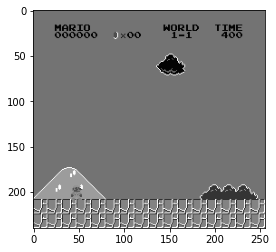

In [14]:
plt.imshow(state[0])

In [2]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [9]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'train_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [17]:
CHECKPOINT_DIR = "./train"
LOGS_DIR = "./logs"

In [18]:
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [19]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOGS_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [20]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs\PPO_1
----------------------------
| time/              |     |
|    fps             | 30  |
|    iterations      | 1   |
|    time_elapsed    | 16  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 2             |
|    time_elapsed         | 46            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 3.1865202e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00799      |
|    learning_rate        | 1e-06         |
|    loss                 | 210           |
|    n_updates            | 10            |
|    policy_gradient_loss | -1.26e-05     |
|    value_loss           | 535           |
-------------------------

KeyboardInterrupt: 

In [24]:
model = PPO.load('./train/train_model_1000000')

In [25]:
state = env.reset()

In [26]:
state = env.reset()

while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()